# 09_NonParametric_Mann_whitney

## Evaluate the Mann-Whitney U test for DIC and temperature data. Create boxplots and violin plots for these analyses.

In [1]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
#Función para leer csv
def read_csv(file):
    return pd.read_csv(file)

In [3]:
#Leer CSV e impresión de info
path = "./BD/bd_exercises_curse.csv"
bd_data = read_csv(path)

print(bd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

In [8]:
#Se define la media de la temperatura
median_temp = bd_data["temp_c"].median()
#Se define una columna nueva que tiene el grupo al que pertenece
bd_data["temp_group"] = bd_data["temp_c"].apply(lambda x: "Baja" if x <= median_temp else "Alta")

In [11]:
bd_data.columns


Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data', 'temp_group'],
      dtype='object')

In [13]:
#Se crean dos variables para agrupar el campo dic según su temperatura
dic_baja = bd_data[bd_data["temp_group"] == "Baja"]["dic_micromol_kg"]
dic_alta = bd_data[bd_data["temp_group"] == "Alta"]["dic_micromol_kg"]

In [15]:
stat, p = mannwhitneyu(dic_baja, dic_alta, alternative='two-sided')
print("Mann-Whitney U test")
print(f"Estadístico : {stat}")
print(f"Valor p: {p}")

Mann-Whitney U test
Estadístico : 1639.0
Valor p: 0.13925218354876606


### Boxplot

C:\Users\yurev\AppData\Local\Temp\ipykernel_17272\2934570908.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_group", y="dic_micromol_kg", data=bd_data, palette=my_colors)


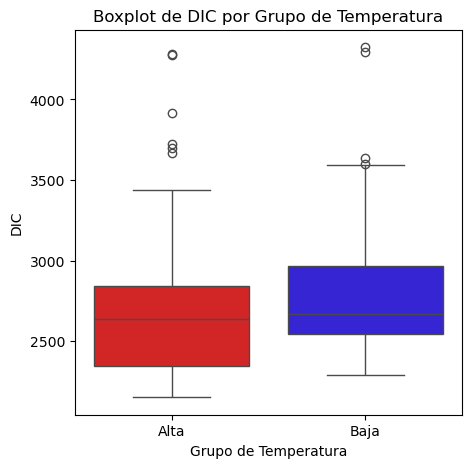

In [19]:
my_colors =["#ef0808", "#1f08ef"]#X

plt.figure(figsize=(5,5))
sns.boxplot(x="temp_group", y="dic_micromol_kg", data=bd_data, palette=my_colors)
plt.title("Boxplot de DIC por Grupo de Temperatura")
plt.xlabel("Grupo de Temperatura")
plt.ylabel("DIC")
plt.show()

### Violin


C:\Users\yurev\AppData\Local\Temp\ipykernel_17272\2394218907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="temp_group", y="dic_micromol_kg", data=bd_data, palette=my_colors)


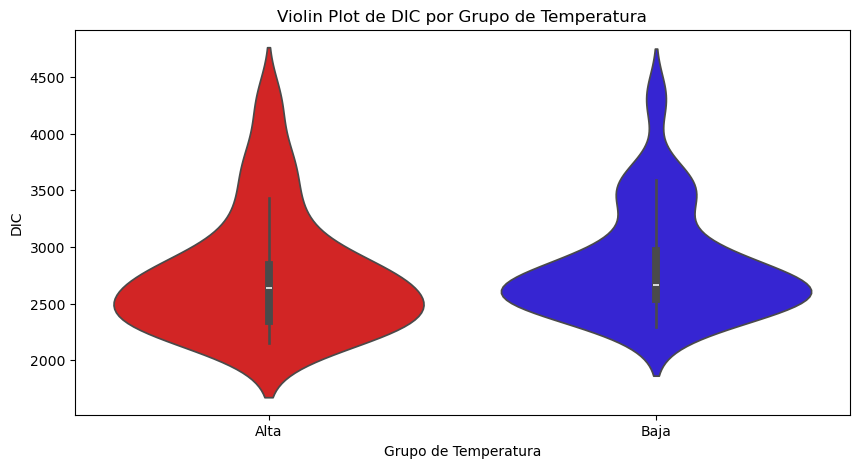

In [20]:
plt.figure(figsize=(10,5))
sns.violinplot(x="temp_group", y="dic_micromol_kg", data=bd_data, palette=my_colors)
plt.title("Violin Plot de DIC por Grupo de Temperatura")
plt.xlabel("Grupo de Temperatura")
plt.ylabel("DIC")
plt.show()